# Titanic Survival Prediction

## Introduction

On April 15, 1912, during her first voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. This project will consist of an analysis of the different circumstances and characteristics (referred to as _features_) of each passenger, and will try to predict the survival of passengers based on these features. 

This prediction model is created as part of a Kaggle challenge, which can be found [here](https://www.kaggle.com/c/titanic).


## Data

The raw data for this analysis consists of 3 csv files:
- train.csv 
- test.csv

The data in train.csv will be used to train the prediction model, and the test.csv will be used to test how well the model is able to predict the survival of passengers by submitting the results to Kaggle. The train.csv file contains the following columns:

| **Column** | **Description** | **Key** |
| ---| --- | --- |
| PassengerId | The unique identifier of each passenger | |
| Survived | Whether or not the passenger survived | 0 = not survived, 1 = survived|
| Pclass | The class in which the passenger was staying on the Titanic | 1 = 1st class, 2 = 2nd class, 3 = 3rd class|
| Name | Name and title of the passenger | |
| Sex | Gender of the passenger | male, female| 
| Age | Age in years | |
| SibSp | Number of siblings / spouses aboard the Titanic | | 
| Parch | Number of parents / children aboard the Titanic | |
| Ticket | Ticket number of the passenger | |
| Fare | Price of the passenger's ticket | |
| Cabin | Cabin number of the passenger | |
| Embarked | Port from which the passenger embarked the Titanic | C = Cherbourg, Q = Queenstown, S = Southampton|


The test.csv file contains all above mentioned columns, except for the column "Survived".

For the data exploration, data preparation and model creation, only the train.csv file will be used. 

## Package imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## Initial Data Exploration

In [7]:
titanic_df = pd.read_csv("../raw_data/train.csv")
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
titanic_df.shape
print(f'There are {titanic_df.shape[0]} rows/passengers and {titanic_df.shape[1]} columns in the dataframe')

There are 891 rows/passengers and 12 columns in the dataframe


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_df.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The profile report shows that there are some missing values in the dataset, and high correlation between some of the columns. In addition, there are some columns that don't provide additional information to predict the survival of the passengers. Before looking deeper into the relationship between the features, we will first prepare the data for analysis. 

## Data Preparation

### Duplicate values

In [11]:
titanic_df.duplicated().sum()

0

There are no duplicate values in the training dataset.

### Columns to drop

#### PassengerId

The column PassengerId is a unique identifier of the passenger in our dataframe. This is however not a meaningful column for our survival prediction, which it doesn't tell us anything significant about the passenger. We will therefore drop the columb from our data 

In [12]:
titanic_df.drop("PassengerId", axis="columns", inplace=True)

In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### Ticket

In [14]:
titanic_df["Ticket"].value_counts().count()

681

There are 681 different values for the Ticket column

In [15]:
titanic_df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Since there are 681 different values for Ticket, and the ticket number doens't give us any more information, we will drop the column from the analysis.

In [16]:
titanic_df.drop("Ticket", axis="columns", inplace=True)

In [17]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Missing values

In [18]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Not all columns are filled with values. The following columns have missing values:
- Age: 177 missing values
- Cabin: 687 missing values
- Embarked: 2 missing values

Let's see for each of the columns why the values could be missing

#### Age

In [19]:
titanic_df[titanic_df["Age"].isnull()]

Survived  Pclass                                      Name     Sex  Age  \
5           0       3                          Moran, Mr. James    male  NaN   
17          1       2              Williams, Mr. Charles Eugene    male  NaN   
19          1       3                   Masselmani, Mrs. Fatima  female  NaN   
26          0       3                   Emir, Mr. Farred Chehab    male  NaN   
28          1       3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN   
..        ...     ...                                       ...     ...  ...   
859         0       3                          Razi, Mr. Raihed    male  NaN   
863         0       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN   
868         0       3               van Melkebeke, Mr. Philemon    male  NaN   
878         0       3                        Laleff, Mr. Kristo    male  NaN   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN   

     SibSp  Parch     Fare Cabin Embarked  
5        0      0   8.4583   NaN        Q  
17       0      0  13.0000   NaN        S  
19       0      0   7.2250   NaN        C  
26       0      0   7.2250   NaN        C  
28       0      0   7.8792   NaN        Q  
..     ...    ...      ...   ...      ...  
859      0      0   7.2292   NaN        C  
863      8      2  69.5500   NaN        S  
868      0      0   9.5000   NaN        S  
878      0      0   7.8958   NaN        S  
888      1      2  23.4500   NaN        S  

[177 rows x 10 columns]

There is no clear reason why the ages are missing for these passengers. To fill the missing data, we will use a Simple Imputer to fill these missing fields with the mean of the entire Age column. 

In [20]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
titanic_df["Age"] = imp_mean.fit_transform(titanic_df[["Age"]])
titanic_df[titanic_df["Age"].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked]
Index: []

#### Cabin

In [21]:
titanic_df[titanic_df["Cabin"].isnull()]

Survived  Pclass                                      Name     Sex  \
0           0       3                   Braund, Mr. Owen Harris    male   
2           1       3                    Heikkinen, Miss. Laina  female   
4           0       3                  Allen, Mr. William Henry    male   
5           0       3                          Moran, Mr. James    male   
7           0       3            Palsson, Master. Gosta Leonard    male   
..        ...     ...                                       ...     ...   
884         0       3                    Sutehall, Mr. Henry Jr    male   
885         0       3      Rice, Mrs. William (Margaret Norton)  female   
886         0       2                     Montvila, Rev. Juozas    male   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   
890         0       3                       Dooley, Mr. Patrick    male   

           Age  SibSp  Parch     Fare Cabin Embarked  
0    22.000000      1      0   7.2500   NaN        S  
2    26.000000      0      0   7.9250   NaN        S  
4    35.000000      0      0   8.0500   NaN        S  
5    29.699118      0      0   8.4583   NaN        Q  
7     2.000000      3      1  21.0750   NaN        S  
..         ...    ...    ...      ...   ...      ...  
884  25.000000      0      0   7.0500   NaN        S  
885  39.000000      0      5  29.1250   NaN        Q  
886  27.000000      0      0  13.0000   NaN        S  
888  29.699118      1      2  23.4500   NaN        S  
890  32.000000      0      0   7.7500   NaN        Q  

[687 rows x 10 columns]

In [22]:
titanic_df["Cabin"].value_counts().count()

147

There are 147 different values in the Cabin column

In [23]:
titanic_df[titanic_df["Cabin"].isnull()]["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [24]:
titanic_df[titanic_df["Cabin"].notnull()]["Pclass"].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

It is also very difficult to see why some passengers have a registration of the cabin, and why some have not. As [this article from BBC](https://www.bbc.co.uk/bitesize/topics/z8mpfg8/articles/zkg9dxs) states, there were cabins for all 3 classes on the Titanic. Since there are 687 missing values, and 147 different cabin numbers, the Cabin column doesn't give us much information on the passengers. Therefoee, we drop the whole column from the dataset

In [25]:
titanic_df.drop(columns=["Cabin"], inplace=True)

In [26]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### Embarked

In [27]:
titanic_df[titanic_df["Embarked"].isnull()]

Survived  Pclass                                       Name     Sex  \
61          1       1                        Icard, Miss. Amelie  female   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Fare Embarked  
61   38.0      0      0  80.0      NaN  
829  62.0      0      0  80.0      NaN

There are only 2 passengers of which the Embarked column fields are missing. A quick google search shows that:
- [Miss. Amelie Icard embarked on Southampton](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
- [Mrs. George Nelson (Martha Evelyn) Stone also embarked on Southamption](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

Therefore, these missing values will be filled with "S". 

In [28]:
titanic_df[titanic_df["Embarked"].isnull()]

Survived  Pclass                                       Name     Sex  \
61          1       1                        Icard, Miss. Amelie  female   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Fare Embarked  
61   38.0      0      0  80.0      NaN  
829  62.0      0      0  80.0      NaN

In [29]:
titanic_df["Embarked"].fillna("S", inplace=True)

In [30]:
titanic_df.loc[[61,829]]

Survived  Pclass                                       Name     Sex  \
61          1       1                        Icard, Miss. Amelie  female   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Fare Embarked  
61   38.0      0      0  80.0        S  
829  62.0      0      0  80.0        S

In [31]:
titanic_df["Embarked"].isnull().sum()

0

### Other columns

#### Sex

In [32]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are only 2 values in this column, male and female, and there are no missing values. 

#### Name

In [33]:
titanic_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

It is difficult to see whether there are any missing values in the Name column. I do see that there is some information on the Title of the passenger in the name column. I will create a new Title column in Feature Engineering to use this information. 

#### ** Feature engineering - Title column

In [34]:
titanic_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The Name column contains the title of the passenger, which will be added to a new column called Title. 

In [35]:
titanic_df["Title"] = titanic_df["Name"].apply(lambda x: x.split(",")[1].split(".")[0])

In [36]:
titanic_df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  Title  
0    male  22.0      1      0   7.2500        S     Mr  
1  female  38.0      1      0  71.2833        C    Mrs  
2  female  26.0      0      0   7.9250        S   Miss  
3  female  35.0      1      0  53.1000        S    Mrs  
4    male  35.0      0      0   8.0500        S     Mr

In [37]:
titanic_df["Title"].value_counts().sum()

891

In [38]:
titanic_df.shape[0]

891

There are no missing values in the Title column, which means that we can now use the Title column for our analysis. 

### Distibution of numerical data

In [39]:
titanic_df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

There are 6 numerical columns in the data to be explored for the prediction model:
- Pclass
- Age
- SibSp
- Parch
- Fare

Let's first look at the individual distribution of these features, and then see if there is a correlation between each of these features. 

#### Individual distribution plots

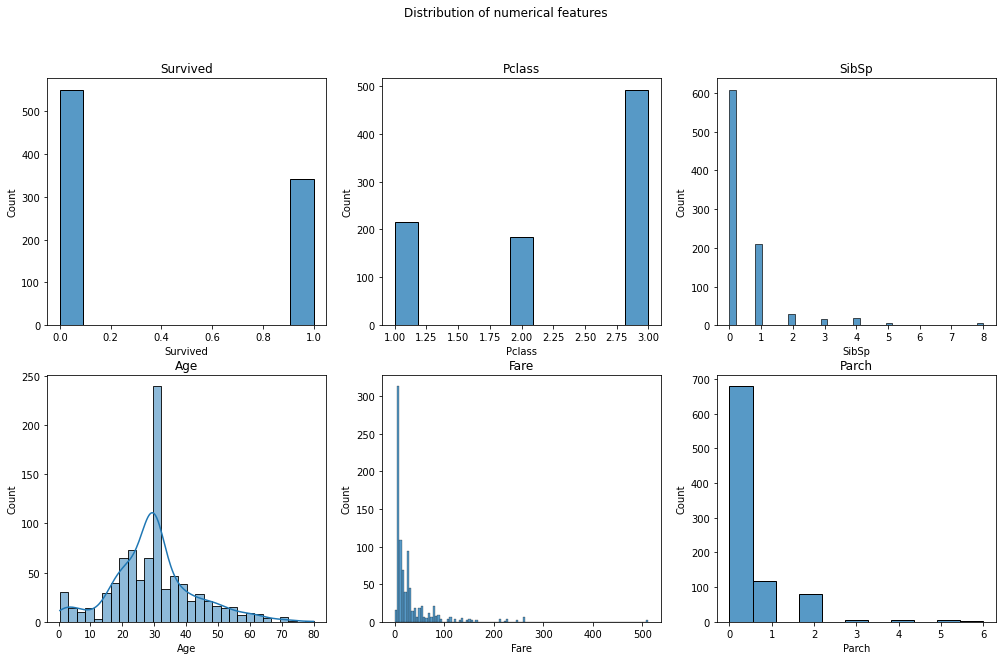

In [40]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(17,10))
sns.histplot(titanic_df['Survived'], ax=axs[0,0])
sns.histplot(titanic_df['Pclass'], ax=axs[0,1])
sns.histplot(titanic_df['SibSp'], ax=axs[0,2])
sns.histplot(titanic_df['Age'], ax=axs[1,0], kde=True)
sns.histplot(titanic_df['Fare'], ax=axs[1,1])
sns.histplot(titanic_df['Parch'], ax=axs[1,2])

axs[0,0].set_title("Survived")
axs[0,1].set_title("Pclass")
axs[0,2].set_title("SibSp")
axs[1,0].set_title("Age")
axs[1,1].set_title("Fare")
axs[1,2].set_title("Parch")

fig.suptitle("Distribution of numerical features")
plt.show()

### Distibution of categorical data

In [41]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


The categorical columns in this dataset are:
- Name
- Sex
- Embarked
- Title (newly created column)

Since Name is a unique value for each of the passengers, it doesn't make sense to look at the distribution of this column's values.

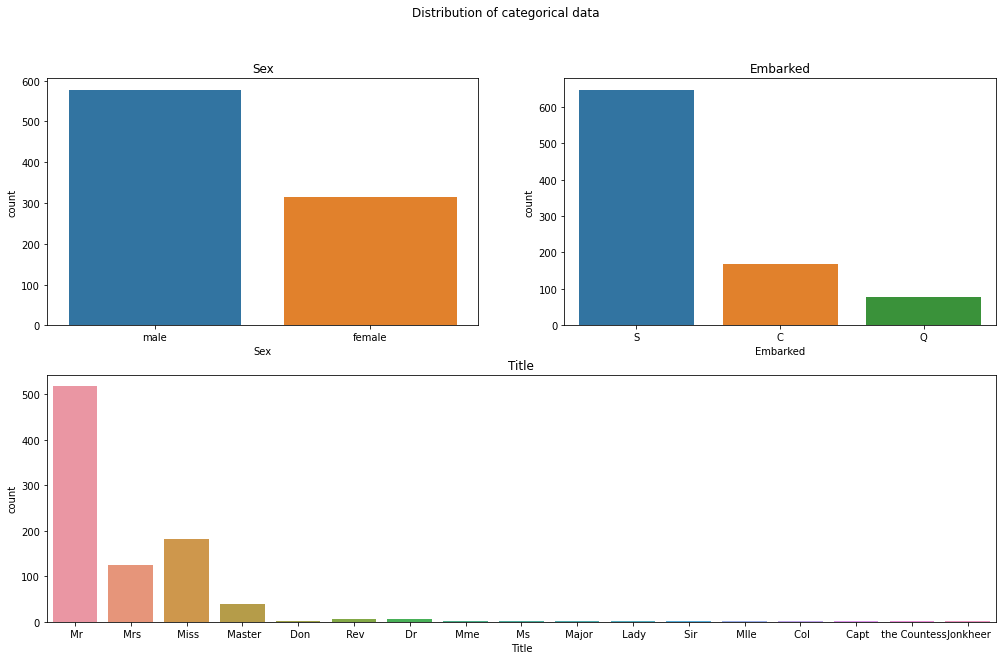

In [42]:
fig = plt.figure(figsize=(17, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]
sns.countplot(x='Sex', data=titanic_df, ax=ax1)
sns.countplot(x='Embarked', data=titanic_df, ax=ax2)
sns.countplot(x='Title', data=titanic_df, ax=ax3);
ax1.set_title("Sex")
ax2.set_title("Embarked")
ax3.set_title("Title")
fig.suptitle("Distribution of categorical data");

### Correlation between features

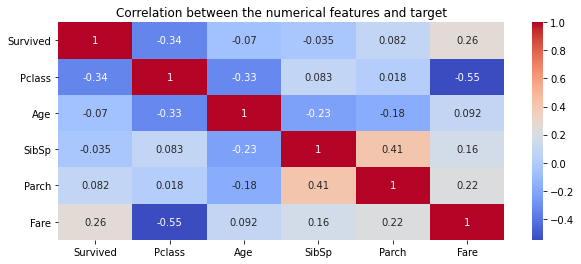

In [43]:
fig = plt.figure(figsize=(10,4))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm').set_title("Correlation between the numerical features and target");

There seems to be some correlation between:
- Pclass and Fare (-0.55)
- SibSp and Parch (0.41)
- Pclass and Age (-0.37)
- Survived and Plcass (-0.34)
- SibSp and Age (-0.31)

Let's visualize the relationship between these features better.

#### Pclass and Fare

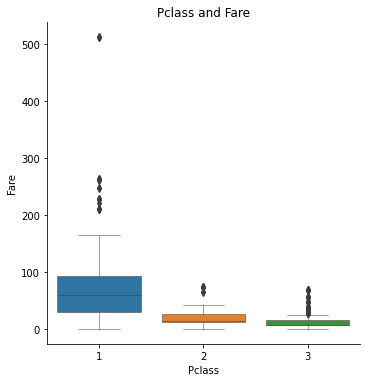

In [44]:
sns.catplot(x="Pclass", y="Fare", data=titanic_df, kind="box", height=5, linewidth=0.5)
plt.title("Pclass and Fare");

The relationship shows that the lower fare prices were mostly for Pclass 3, and the highest fare prices for Pclass 1. There is however some overplat, and it seems that there were tickets at 0 for each of the Pclasses, and some tickets for Plcass 1 and Pclass 2 that were the same price as Plcass 1. The interquartile range of the Pclasses hardly overlap though. 

#### SibSp and Parch

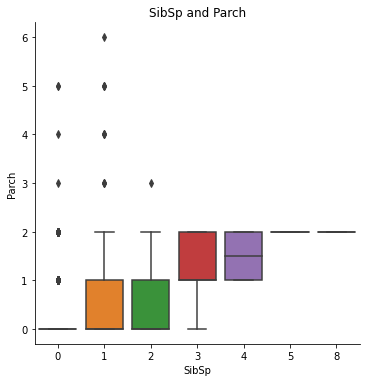

In [45]:
sns.catplot(x="SibSp", y="Parch", data=titanic_df, kind="box")
plt.title("SibSp and Parch");

Most passengers that travel with siblings or spouses also travel with 1 or 2 parents or children. Therefore, it might be interesting to take these two features together and create a new Family column that takes the sum of both columns for each passenger.

#### ** Feature engineering - Family column

In [46]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

The new Family column will add the values of SipSp and Parch for each passenger.

In [47]:
titanic_df["Family"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [48]:
titanic_df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  Title  Family  
0    male  22.0      1      0   7.2500        S     Mr       1  
1  female  38.0      1      0  71.2833        C    Mrs       1  
2  female  26.0      0      0   7.9250        S   Miss       0  
3  female  35.0      1      0  53.1000        S    Mrs       1  
4    male  35.0      0      0   8.0500        S     Mr       0

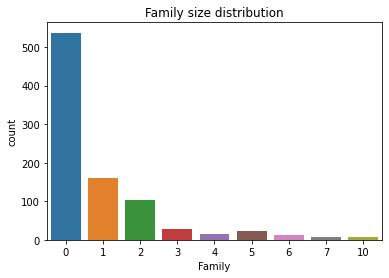

In [49]:
sns.countplot(x="Family", data=titanic_df)
plt.title("Family size distribution");

#### Pclass and Age

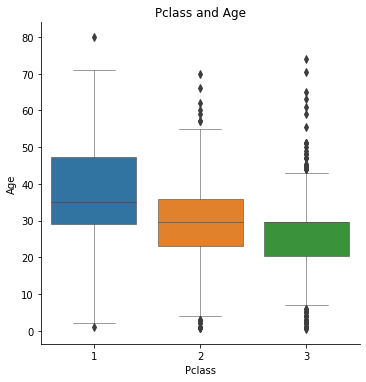

In [50]:
sns.catplot(x="Pclass", y="Age", data=titanic_df, kind="box", height=5, linewidth=0.5)
plt.title("Pclass and Age");

We see that younger passengers are mostly in the Pclasses 3 and 2. 

#### SibSp/Family and Age 

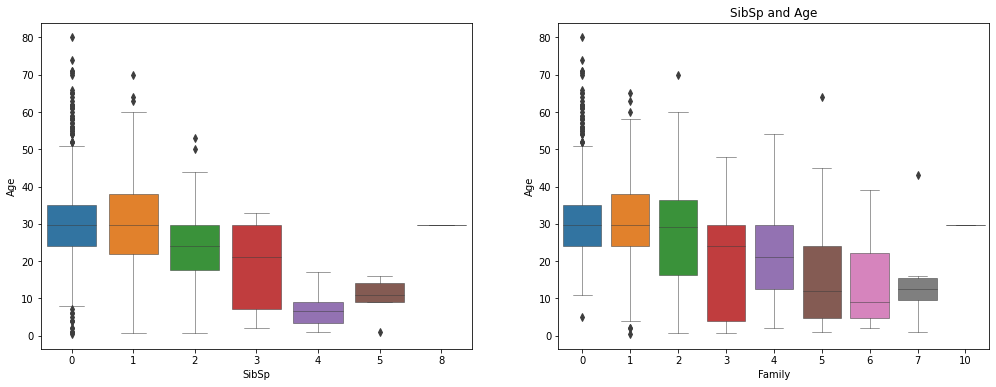

In [51]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
sns.boxplot(x="SibSp", y="Age", data=titanic_df, linewidth=0.5, ax=ax[0])
sns.boxplot(x="Family", y="Age", data=titanic_df,linewidth=0.5, ax=ax[1])
plt.title("SibSp and Age");

Passengers with more siblings or spouces are usually younger, which would suggest that they are part of larger families with multiple children. Older passengers (55+ in age) mostly traveled alone or with 1 spouce or sibling.

### Correlation with target

We have seen that Pclass, Age and Family are correlated with each other in some way. Let's see if there is a correlation between the features and the target Survived as well. 

#### Survived and Plcass

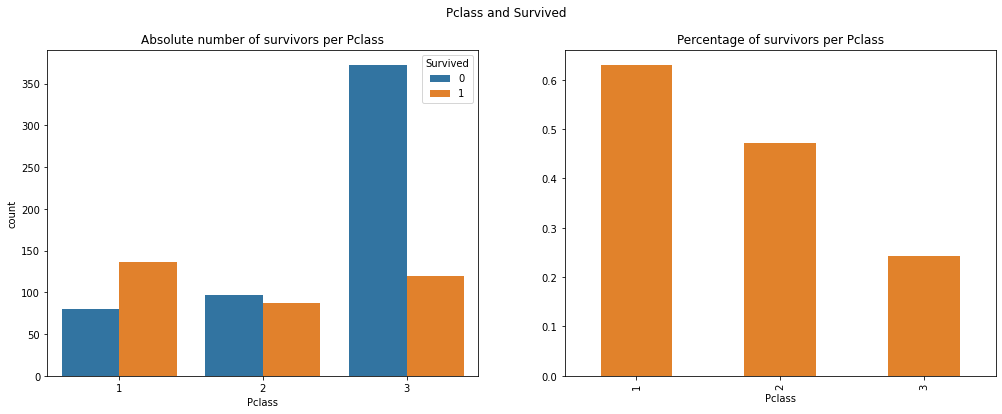

In [52]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
sns.countplot(x="Pclass", data=titanic_df, hue="Survived", ax=ax[0])
ax[0].set_title("Absolute number of survivors per Pclass")

perc_survivors_df = titanic_df.groupby("Pclass")["Survived"].mean()
perc_survivors_df.plot(kind="bar", ax=ax[1], color="#E1822B")
ax[1].set_title("Percentage of survivors per Pclass")

fig.suptitle("Pclass and Survived");

The absolute number of survivors in each class for all 3 classes is somewhere between 80 and 140 for each class. However, since there were a lot more passengers in Pclass 3, the percentage of survivors in Plcass 3 is a lot lower than in Pclass 2, and even lower than in Pclass 1. 

#### Survived, Pclass and Age

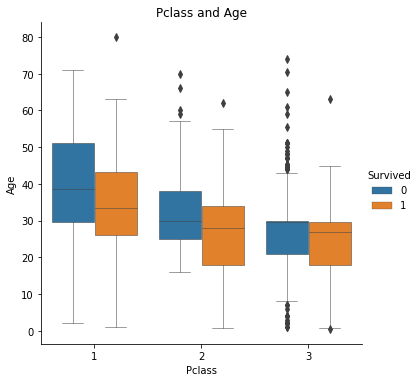

In [53]:
sns.catplot(x="Pclass", y="Age", data=titanic_df, hue="Survived", kind="box", height=5, linewidth=0.5)
plt.title("Pclass and Age");

When adding the Age column to the visualization, we can see that on average more younger people than older people survived in each Pclass.

#### Survived and Age

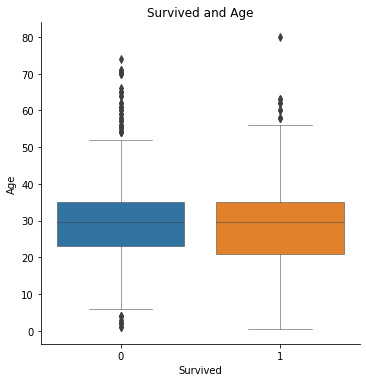

In [54]:
sns.catplot(x="Survived", y="Age", data=titanic_df, linewidth=0.5, kind="box")
plt.title("Survived and Age");

There doesn't seem to be a lot of difference in overall age for the group of survivors compared to the non-survivors.

#### Survived and Embarked

In [55]:
embarked_survivors_df = titanic_df.groupby("Embarked")[["Survived"]].count()
embarked_survivors_df.columns=["Total"]
embarked_survivors_df["Survived"] = titanic_df.groupby("Embarked")[["Survived"]].sum()
embarked_survivors_df["Percentage"] = embarked_survivors_df["Survived"]/embarked_survivors_df["Total"]
embarked_survivors_df

Total  Survived  Percentage
Embarked                             
C           168        93    0.553571
Q            77        30    0.389610
S           646       219    0.339009

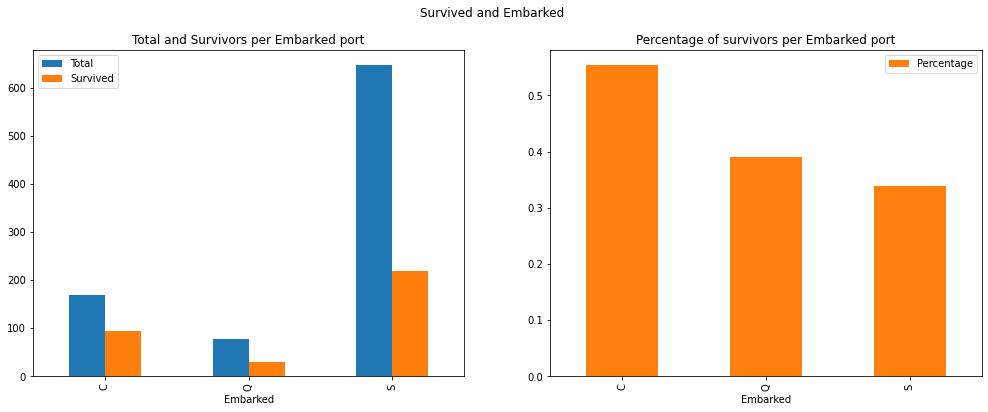

In [56]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
embarked_survivors_df.drop(columns=["Percentage"]).plot(kind="bar", ax=ax[0])
ax[0].set_title("Total and Survivors per Embarked port")
embarked_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Embarked port")
plt.suptitle("Survived and Embarked");

The percentage of survivors from the embarked port Cherbourg (France) is higher than from Queensland (Ireland) and Southampton (U.K). Perhaps this has to do with the Pclass of the Passengers.

#### Survived, Embarked and Pclass 

In [57]:
embarked_pclass_df = titanic_df.groupby(["Embarked", "Pclass"])[["Survived"]].count()
embarked_pclass_df.columns=["Total"]
embarked_pclass_df["Survived"] = titanic_df.groupby(["Embarked", "Pclass"])[["Survived"]].sum()
embarked_pclass_df["Percentage"] = embarked_pclass_df["Survived"]/embarked_pclass_df["Total"]
embarked_pclass_df

Total  Survived  Percentage
Embarked Pclass                             
C        1          85        59    0.694118
         2          17         9    0.529412
         3          66        25    0.378788
Q        1           2         1    0.500000
         2           3         2    0.666667
         3          72        27    0.375000
S        1         129        76    0.589147
         2         164        76    0.463415
         3         353        67    0.189802

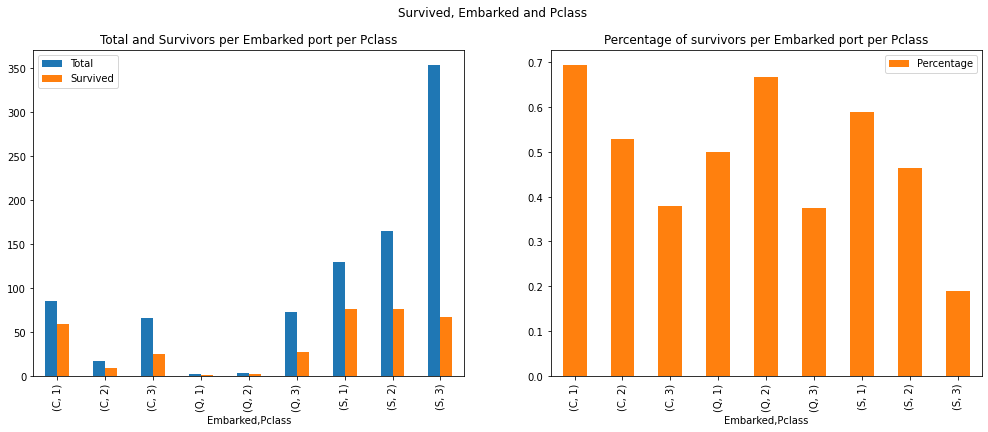

In [58]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
embarked_pclass_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Embarked port per Pclass")
embarked_pclass_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Embarked port per Pclass")
plt.suptitle("Survived, Embarked and Pclass");

Most of the passengers in Cherbourg were in the 1st class or 3rd class, however many more passengers in the 1st class embarked in Cherbourg survived. There is also a high survival rate for the 2nd class passengers that embarked in Queensland, however there were only a few passengers in this group. The 3rd class Southampton passengers is by far the largest group, and has the lowers survival rate. 

In [59]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Family'],
      dtype='object')

#### Survived and Sex

In [60]:
sex_survivors_df = titanic_df.groupby("Sex")[["Survived"]].count()
sex_survivors_df.columns=["Total"]
sex_survivors_df["Survived"] = titanic_df.groupby("Sex")[["Survived"]].sum()
sex_survivors_df["Percentage"] = sex_survivors_df["Survived"]/sex_survivors_df["Total"]
sex_survivors_df

Total  Survived  Percentage
Sex                                
female    314       233    0.742038
male      577       109    0.188908

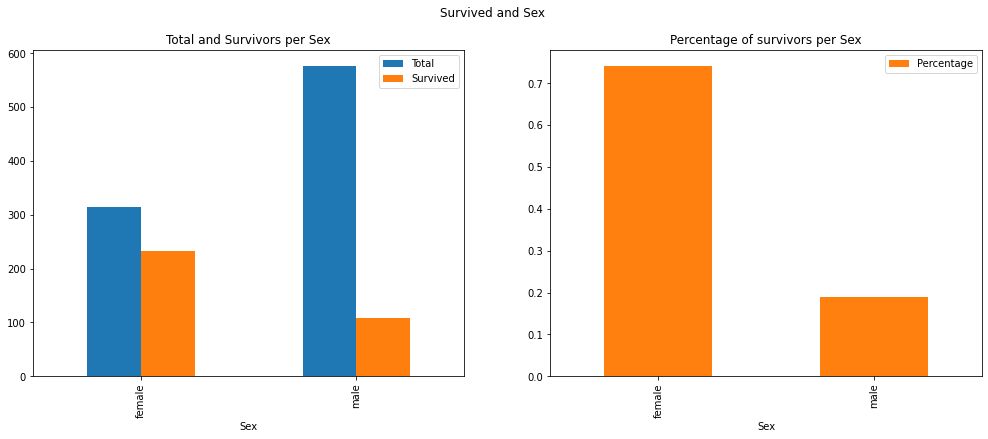

In [61]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
sex_survivors_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Sex")
sex_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Sex")
plt.suptitle("Survived and Sex");

It is very clear to see that the survival rate for female passengers is a lot higher that the survival rate of male passengers.

#### Survived and Family

In [62]:
fam_survivors_df = titanic_df.groupby("Family")[["Survived"]].count()
fam_survivors_df.columns=["Total"]
fam_survivors_df["Survived"] = titanic_df.groupby("Family")[["Survived"]].sum()
fam_survivors_df["Percentage"] = fam_survivors_df["Survived"]/fam_survivors_df["Total"]
fam_survivors_df

Total  Survived  Percentage
Family                             
0         537       163    0.303538
1         161        89    0.552795
2         102        59    0.578431
3          29        21    0.724138
4          15         3    0.200000
5          22         3    0.136364
6          12         4    0.333333
7           6         0    0.000000
10          7         0    0.000000

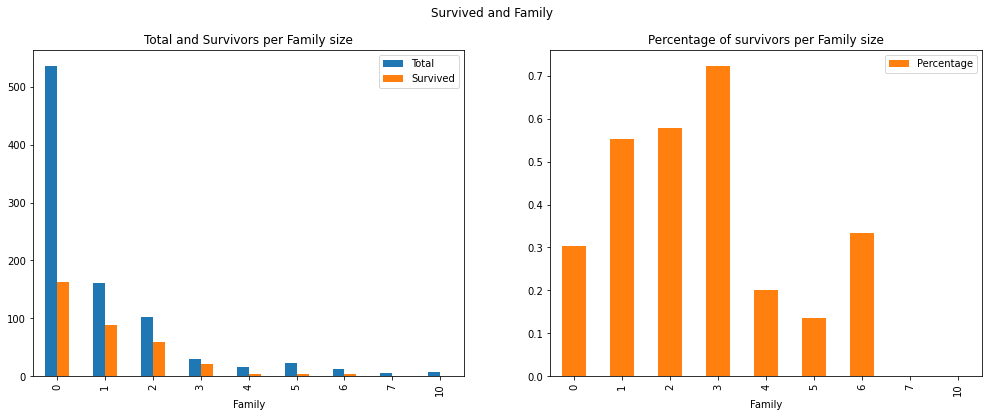

In [63]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
fam_survivors_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Family size")
fam_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Family size")
plt.suptitle("Survived and Family");

Even though there were much more passengers with no additional family on board, the higher survival rates are found for passengers with a Family size of 3, 2 or 1. 

#### Survived and Title

In [64]:
title_survivors_df = titanic_df.groupby("Title")[["Survived"]].count()
title_survivors_df.columns=["Total"]
title_survivors_df["Survived"] = titanic_df.groupby("Title")[["Survived"]].sum()
title_survivors_df["Percentage"] = title_survivors_df["Survived"]/title_survivors_df["Total"]
title_survivors_df.sort_values("Total", ascending=False, inplace=True)
title_survivors_df

Total  Survived  Percentage
Title                                     
 Mr              517        81    0.156673
 Miss            182       127    0.697802
 Mrs             125        99    0.792000
 Master           40        23    0.575000
 Dr                7         3    0.428571
 Rev               6         0    0.000000
 Major             2         1    0.500000
 Col               2         1    0.500000
 Mlle              2         2    1.000000
 Sir               1         1    1.000000
 Ms                1         1    1.000000
 Capt              1         0    0.000000
 Mme               1         1    1.000000
 Lady              1         1    1.000000
 Jonkheer          1         0    0.000000
 Don               1         0    0.000000
 the Countess      1         1    1.000000

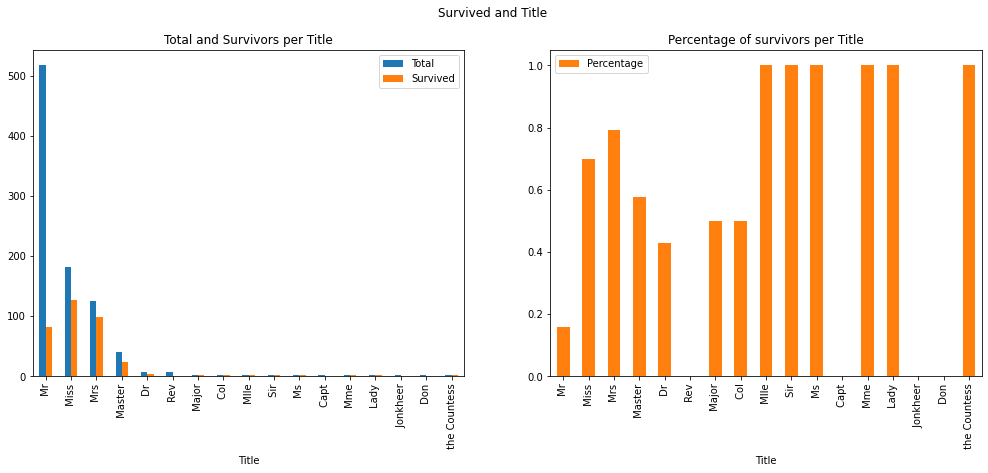

In [65]:
fig, ax = plt.subplots(1,2, figsize=(17,6))
title_survivors_df[["Total", "Survived"]].plot(kind="bar",ax=ax[0])
ax[0].set_title("Total and Survivors per Title")
title_survivors_df[["Percentage"]].plot(kind="bar", ax=ax[1], color="#FF800E")
ax[1].set_title("Percentage of survivors per Title")
plt.suptitle("Survived and Title");

In [66]:
title_survivors_df = titanic_df.groupby(["Title", "Pclass"])[["Survived"]].count()
title_survivors_df.columns=["Total"]
title_survivors_df["Survived"] = titanic_df.groupby(["Title", "Pclass"])[["Survived"]].sum()
title_survivors_df["Percentage"] = title_survivors_df["Survived"]/title_survivors_df["Total"]
title_survivors_df.sort_values("Total", ascending=False, inplace=True)
title_survivors_df

Total  Survived  Percentage
Title         Pclass                             
 Mr           3         319        36    0.112853
              1         107        37    0.345794
 Miss         3         102        51    0.500000
 Mr           2          91         8    0.087912
 Miss         1          46        44    0.956522
 Mrs          3          42        21    0.500000
              1          42        41    0.976190
              2          41        37    0.902439
 Miss         2          34        32    0.941176
 Master       3          28        11    0.392857
              2           9         9    1.000000
 Rev          2           6         0    0.000000
 Dr           1           5         3    0.600000
 Master       1           3         3    1.000000
 Major        1           2         1    0.500000
 Col          1           2         1    0.500000
 Mlle         1           2         2    1.000000
 Dr           2           2         0    0.000000
 Ms           2           1         1    1.000000
 Sir          1           1         1    1.000000
 Capt         1           1         0    0.000000
 Mme          1           1         1    1.000000
 Lady         1           1         1    1.000000
 Jonkheer     1           1         0    0.000000
 Don          1           1         0    0.000000
 the Countess 1           1         1    1.000000

There are a many titles that are only referring to 1 passenger each. Therefore, we see many 100% and 0% survival rates for these titles. What we again can see here, is that titles refering to female passengers (Miss and Mrs) have a higher survival rate. In addition, the title Master, a relatively large group of passengers compared to the other titles, also has a high survival rate.

## Feature Selection

As we have seen from the correlation between features and correlation with the targets, there are a few features that give specific insight in the survival of the passengers. For the next step of the analysis, we will take into account the following features:

|**features**|
|---|
|Pclass|
|Sex|
|Age|
|SibSp|
|Parch|
|Family|
|Embarked|
|Fare|
|Title|

As we have already checked for duplicates in the entire dataset, this is not necessary anymore. We will have to check for outliers, scale the numerical features and use an encoder on the categorical features. 

In [67]:
features_df = titanic_df[["Pclass", "Sex", "Age", "SibSp", "Parch","Family","Embarked","Fare","Title"]]
features_df

Pclass     Sex        Age  SibSp  Parch  Family Embarked     Fare  Title
0         3    male  22.000000      1      0       1        S   7.2500     Mr
1         1  female  38.000000      1      0       1        C  71.2833    Mrs
2         3  female  26.000000      0      0       0        S   7.9250   Miss
3         1  female  35.000000      1      0       1        S  53.1000    Mrs
4         3    male  35.000000      0      0       0        S   8.0500     Mr
..      ...     ...        ...    ...    ...     ...      ...      ...    ...
886       2    male  27.000000      0      0       0        S  13.0000    Rev
887       1  female  19.000000      0      0       0        S  30.0000   Miss
888       3  female  29.699118      1      2       3        S  23.4500   Miss
889       1    male  26.000000      0      0       0        C  30.0000     Mr
890       3    male  32.000000      0      0       0        Q   7.7500     Mr

[891 rows x 9 columns]

### Outliers and scaling

#### Age

The Age column has values between 0.42 and 80.0 years 



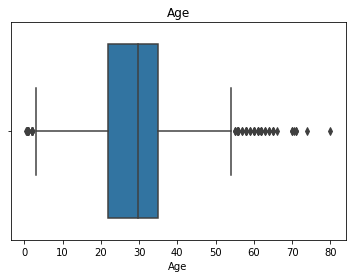

In [68]:
sns.boxplot(x= "Age", data=features_df)
plt.title("Age");
print(f'The Age column has values between {features_df["Age"].min()} and {features_df["Age"].max()} years \n')

There are no outliers that are abnormal, but there are definately some outliers in the Age column. Therefore, we will use a Robust Scaler t

In [69]:
from sklearn.preprocessing import RobustScaler

r_scaler_age = RobustScaler() 
r_scaler_age.fit(features_df[["Age"]])
features_df["Age"] = r_scaler_age.transform(features_df[["Age"]])

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


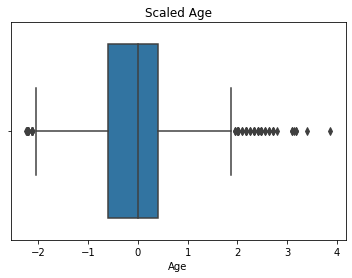

In [70]:
sns.boxplot(x= "Age", data=features_df)
plt.title("Scaled Age");

#### Fare

The Fare column has values between 0.0 and 512.3292 



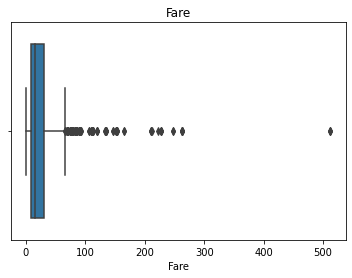

In [71]:
sns.boxplot(x= "Fare", data=features_df)
plt.title("Fare");
print(f'The Fare column has values between {features_df["Fare"].min()} and {features_df["Fare"].max()} \n')

There is 1 outlier that is very far from the rest. Let's see which passenger this ticket is referring to

In [72]:
max_fare_index = features_df["Fare"].argmax()
titanic_df.loc[max_fare_index]

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                     35.0
SibSp                      0
Parch                      0
Fare                512.3292
Embarked                   C
Title                   Miss
Family                     0
Name: 258, dtype: object

The high Fare price was paid for Miss Anna Ward, who was in first class. As this passenger was the maid of a wealthy widow (according to [this article](https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html)), we can assume that the price is correct, and we will not remove it from the trainingset. 

Since there are quite some outliers, the Robust Scaler is the best option for this column. 

In [73]:
r_scaler_fare = RobustScaler() 
r_scaler_fare.fit(features_df[["Fare"]])
features_df["Fare"] = r_scaler_fare.transform(features_df[["Fare"]])

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


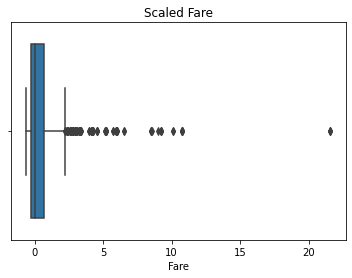

In [74]:
sns.boxplot(x= "Fare", data=features_df)
plt.title("Scaled Fare");

#### SibSp

The SibSp column has values between 0 and 8 



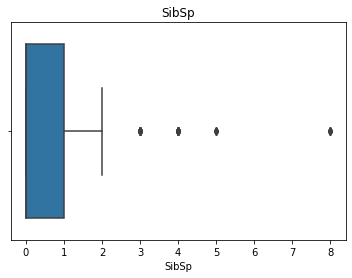

In [75]:
sns.boxplot(x= "SibSp", data=features_df)
plt.title("SibSp");
print(f'The SibSp column has values between {features_df["SibSp"].min()} and {features_df["SibSp"].max()} \n')

There are no negative or extremely high values for the SibSp column. There are some outliers, but since it is an ordinal feature, we will use the MinMax Scaler

In [76]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler_sibsp = MinMaxScaler()
mm_scaler_sibsp.fit(features_df[["SibSp"]])
features_df["SibSp"] = mm_scaler_sibsp.transform(features_df[["SibSp"]])

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


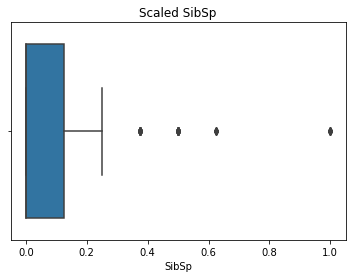

In [77]:
sns.boxplot(x= "SibSp", data=features_df)
plt.title("Scaled SibSp");

#### Parch

The Parch column has values between 0 and 6 



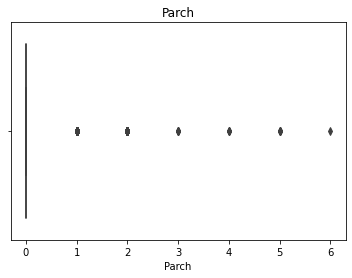

In [78]:
sns.boxplot(x= "Parch", data=features_df)
plt.title("Parch");
print(f'The Parch column has values between {features_df["Parch"].min()} and {features_df["Parch"].max()} \n')

Most of the values in the Parch column are 0, so there are quite some outliers. However, since it's and oridinal feature, we will use the MinMax Scaler

In [79]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler_parch = MinMaxScaler()
mm_scaler_parch.fit(features_df[["Parch"]])
features_df["Parch"] = mm_scaler_parch.transform(features_df[["Parch"]])

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


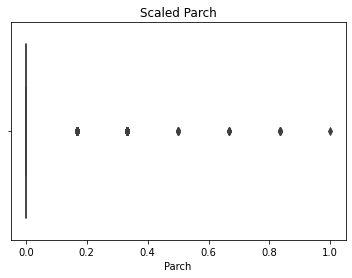

In [80]:
sns.boxplot(x= "Parch", data=features_df)
plt.title("Scaled Parch");

#### Family

The Family column has values between 0 and 10 



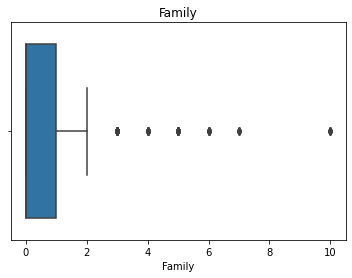

In [81]:
sns.boxplot(x= "Family", data=features_df)
plt.title("Family");
print(f'The Family column has values between {features_df["Family"].min()} and {features_df["Family"].max()} \n')

Since Family is engineered from the SibSp and Parch column, this is also an ordinal feature with some outliers. We will again use the MinMax Scaler on this feature.

In [82]:
mm_scaler_fam = MinMaxScaler()
mm_scaler_fam.fit(features_df[["Family"]])
features_df["Family"] = mm_scaler_fam.transform(features_df[["Family"]])

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


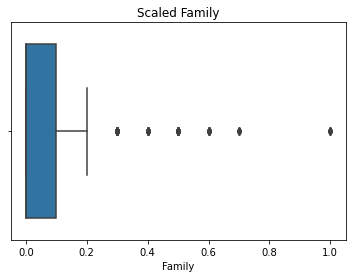

In [83]:
sns.boxplot(x= "Family", data=features_df)
plt.title("Scaled Family");

### Encoding

#### Pclass

In [84]:
features_df["Pclass"].unique()

array([3, 1, 2])

There are 3 labels in the Pclass, so we will use a OneHotEncoder to encode the feature

In [85]:
from sklearn.preprocessing import OneHotEncoder

ohe_pclass = OneHotEncoder(sparse=False)
ohe_pclass.fit(features_df[["Pclass"]])
features_df["Pclass_1"], features_df["Pclass_2"], features_df["Pclass_3"] = ohe_pclass.transform(features_df[["Pclass"]]).T
features_df.drop("Pclass", axis="columns", inplace=True)
features_df.head()

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Sex       Age  SibSp  Parch  Family Embarked      Fare  Title  Pclass_1  \
0    male -0.592240  0.125    0.0     0.1        S -0.312011     Mr       0.0   
1  female  0.638529  0.125    0.0     0.1        C  2.461242    Mrs       1.0   
2  female -0.284548  0.000    0.0     0.0        S -0.282777   Miss       0.0   
3  female  0.407760  0.125    0.0     0.1        S  1.673732    Mrs       1.0   
4    male  0.407760  0.000    0.0     0.0        S -0.277363     Mr       0.0   

   Pclass_2  Pclass_3  
0       0.0       1.0  
1       0.0       0.0  
2       0.0       1.0  
3       0.0       0.0  
4       0.0       1.0

#### Sex

In [86]:
features_df["Sex"].unique()

array(['male', 'female'], dtype=object)

The Sex column only has 2 values, so we can turn this into a binary column where:
- 1: male
- 0: female

In [87]:
ohe_sex = OneHotEncoder(drop='if_binary', sparse=False)
ohe_sex.fit(features_df[["Sex"]])
features_df["Sex"] = ohe_sex.transform(features_df[["Sex"]])
features_df.head()

Sex       Age  SibSp  Parch  Family Embarked      Fare  Title  Pclass_1  \
0  1.0 -0.592240  0.125    0.0     0.1        S -0.312011     Mr       0.0   
1  0.0  0.638529  0.125    0.0     0.1        C  2.461242    Mrs       1.0   
2  0.0 -0.284548  0.000    0.0     0.0        S -0.282777   Miss       0.0   
3  0.0  0.407760  0.125    0.0     0.1        S  1.673732    Mrs       1.0   
4  1.0  0.407760  0.000    0.0     0.0        S -0.277363     Mr       0.0   

   Pclass_2  Pclass_3  
0       0.0       1.0  
1       0.0       0.0  
2       0.0       1.0  
3       0.0       0.0  
4       0.0       1.0

#### Embarked

In [88]:
features_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

There are 3 labels in the Pclass, so we will use a OneHotEncoder to encode the feature

In [89]:
ohe_embark = OneHotEncoder(sparse=False)
ohe_embark.fit(features_df[["Embarked"]])
ohe_embark.categories_
features_df["Embarked_C"], features_df["Embarked_Q"], features_df["Embarked_S"] = ohe_embark.transform(features_df[["Embarked"]]).T
features_df.drop("Embarked", axis="columns", inplace=True)
features_df.head()

Sex       Age  SibSp  Parch  Family      Fare  Title  Pclass_1  Pclass_2  \
0  1.0 -0.592240  0.125    0.0     0.1 -0.312011     Mr       0.0       0.0   
1  0.0  0.638529  0.125    0.0     0.1  2.461242    Mrs       1.0       0.0   
2  0.0 -0.284548  0.000    0.0     0.0 -0.282777   Miss       0.0       0.0   
3  0.0  0.407760  0.125    0.0     0.1  1.673732    Mrs       1.0       0.0   
4  1.0  0.407760  0.000    0.0     0.0 -0.277363     Mr       0.0       0.0   

   Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0       1.0         0.0         0.0         1.0  
1       0.0         1.0         0.0         0.0  
2       1.0         0.0         0.0         1.0  
3       0.0         0.0         0.0         1.0  
4       1.0         0.0         0.0         1.0

#### Title

In [90]:
len(features_df["Title"].unique())

17

There are 17 different values for Title, so we will also use the OneHotEncoder for this feature. 

In [91]:
ohe_title = OneHotEncoder(sparse=False)
ohe_title.fit(features_df[["Title"]])
ohe_title.categories_
features_df["Capt"], features_df["Col"], features_df["Don"], features_df["Dr"], features_df["Jonkheer"], features_df["Lady"], features_df["Major"], features_df["Master"], features_df["Miss"], features_df["Mlle"], features_df["Mme"], features_df["Mr"], features_df["Mrs"], features_df["Ms"], features_df["Rev"], features_df["Sir"], features_df["the Countess"] = ohe_title.transform(features_df[["Title"]]).T
features_df.drop("Title", axis="columns", inplace=True)
features_df.head()

Sex       Age  SibSp  Parch  Family      Fare  Pclass_1  Pclass_2  \
0  1.0 -0.592240  0.125    0.0     0.1 -0.312011       0.0       0.0   
1  0.0  0.638529  0.125    0.0     0.1  2.461242       1.0       0.0   
2  0.0 -0.284548  0.000    0.0     0.0 -0.282777       0.0       0.0   
3  0.0  0.407760  0.125    0.0     0.1  1.673732       1.0       0.0   
4  1.0  0.407760  0.000    0.0     0.0 -0.277363       0.0       0.0   

   Pclass_3  Embarked_C  ...  Master  Miss  Mlle  Mme   Mr  Mrs   Ms  Rev  \
0       1.0         0.0  ...     0.0   0.0   0.0  0.0  1.0  0.0  0.0  0.0   
1       0.0         1.0  ...     0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0   
2       1.0         0.0  ...     0.0   1.0   0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0         0.0  ...     0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0   
4       1.0         0.0  ...     0.0   0.0   0.0  0.0  1.0  0.0  0.0  0.0   

   Sir  the Countess  
0  0.0           0.0  
1  0.0           0.0  
2  0.0           0.0  
3  0.0           0.0  
4  0.0           0.0  

[5 rows x 29 columns]

### Collinearity

Now that we have scaled and encoded our features, the number of dimensions of our analysis has increased from 9 to 29. Since we want to use as less features as needed, we will now again take a look at the correlation between the features and the importance of each feature for predicting the target. 

#### Feature Correlation

Feature correlation gives insight in high correlations between different features. Since high correlation means redundant information, we can use this to see if we can remove features from the analysis to simplify the model. 

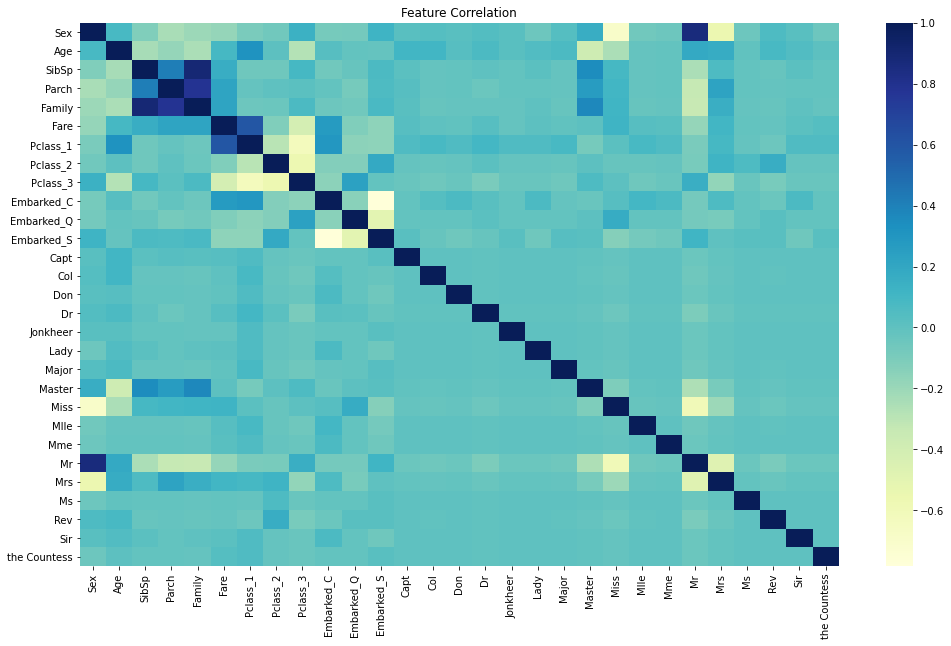

In [92]:
corr = features_df.corr()
fig = plt.figure(figsize=(17,10))
sns.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")
plt.title("Feature Correlation");

In [93]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df

feature_1   feature_2  correlation
62        SibSp      Family     0.890712
118      Family       SibSp     0.890712
667          Mr         Sex     0.867334
23          Sex          Mr     0.867334
119      Family       Parch     0.783111
..          ...         ...          ...
182    Pclass_1    Pclass_3    -0.626738
580        Miss         Sex    -0.686808
20          Sex        Miss    -0.686808
328  Embarked_S  Embarked_C    -0.782742
272  Embarked_C  Embarked_S    -0.782742

[812 rows x 3 columns]

The heatmap shows us the following insights:

1. As was expected, there is a high correlation between SibSp, Parch and Family. Perhaps it is better to only work with one of these features. 
2. We have also seen that there is a high correlation between Fare and Pclass_1, since the fare went up significantly for 1st class passengers. 
3. There is also a high correlation between Sex, Mr and Mrs. Perhaps we can drop either the Sex or the Mr and Mrs columns
4. There is a high negative correlation between Embarked_C and Embarked_S, since passengers could only have onboarded on 1 port. Perhaps only having 1 of the two features will be enough 
5. There is also a high negative correlation between Pclass_1 and Pclass_3, since a passenger can only have one of the 3 Pclasses. So perhaps only 1 or 2 of these Pclass features is needed. 

#### Feature Permutation

With feature permutation, we are looking at the importance of each feature in predicting the target. Taking into account the feature correlation as well, we can remove specific features that don't give additional information and are not important for the analysis. 

In [94]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

X = features_df
y = titanic_df["Survived"]

log_model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

feature score decrease
0            Sex       0.087767
23            Mr        0.03064
19        Master       0.023906
1            Age       0.023232
4         Family       0.014254
8       Pclass_3       0.013468
2          SibSp       0.007407
24           Mrs       0.007183
6       Pclass_1       0.003143
9     Embarked_C       0.002806
11    Embarked_S       0.002132
10    Embarked_Q       0.001347
15            Dr       0.001347
3          Parch       0.001122
16      Jonkheer       0.001122
5           Fare       0.000561
26           Rev       0.000449
18         Major       0.000112
14           Don       0.000112
17          Lady            0.0
21          Mlle            0.0
13           Col            0.0
12          Capt            0.0
25            Ms            0.0
27           Sir            0.0
28  the Countess            0.0
22           Mme      -0.000112
7       Pclass_2      -0.000224
20          Miss       -0.00202

As we can see, there are quite some features that have an importance of 0 or even negative, which give redundant information and can therefore be removed. 

In [95]:
X_new = X.drop(["Miss", "Fare", "Pclass_2", "Don", "the Countess", "Capt", "Rev", "Lady", "Major", "Col", "Mlle", "Mme"], axis="columns")

In [96]:
X_new

Sex       Age  SibSp     Parch  Family  Pclass_1  Pclass_3  Embarked_C  \
0    1.0 -0.592240  0.125  0.000000     0.1       0.0       1.0         0.0   
1    0.0  0.638529  0.125  0.000000     0.1       1.0       0.0         1.0   
2    0.0 -0.284548  0.000  0.000000     0.0       0.0       1.0         0.0   
3    0.0  0.407760  0.125  0.000000     0.1       1.0       0.0         0.0   
4    1.0  0.407760  0.000  0.000000     0.0       0.0       1.0         0.0   
..   ...       ...    ...       ...     ...       ...       ...         ...   
886  1.0 -0.207624  0.000  0.000000     0.0       0.0       0.0         0.0   
887  0.0 -0.823009  0.000  0.000000     0.0       1.0       0.0         0.0   
888  0.0  0.000000  0.125  0.333333     0.3       0.0       1.0         0.0   
889  1.0 -0.284548  0.000  0.000000     0.0       1.0       0.0         1.0   
890  1.0  0.176991  0.000  0.000000     0.0       0.0       1.0         0.0   

     Embarked_Q  Embarked_S   Dr  Jonkheer  Master   Mr  Mrs   Ms  Sir  
0           0.0         1.0  0.0       0.0     0.0  1.0  0.0  0.0  0.0  
1           0.0         0.0  0.0       0.0     0.0  0.0  1.0  0.0  0.0  
2           0.0         1.0  0.0       0.0     0.0  0.0  0.0  0.0  0.0  
3           0.0         1.0  0.0       0.0     0.0  0.0  1.0  0.0  0.0  
4           0.0         1.0  0.0       0.0     0.0  1.0  0.0  0.0  0.0  
..          ...         ...  ...       ...     ...  ...  ...  ...  ...  
886         0.0         1.0  0.0       0.0     0.0  0.0  0.0  0.0  0.0  
887         0.0         1.0  0.0       0.0     0.0  0.0  0.0  0.0  0.0  
888         0.0         1.0  0.0       0.0     0.0  0.0  0.0  0.0  0.0  
889         0.0         0.0  0.0       0.0     0.0  1.0  0.0  0.0  0.0  
890         1.0         0.0  0.0       0.0     0.0  1.0  0.0  0.0  0.0  

[891 rows x 17 columns]

In [97]:
log_model = LogisticRegression().fit(X_new, y) 
permutation_score = permutation_importance(log_model, X_new, y, n_repeats=10) 
importance_df = pd.DataFrame(np.vstack((X_new.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False) 

feature score decrease
0          Sex       0.109203
1          Age       0.026375
12      Master       0.025589
13          Mr       0.023232
6     Pclass_3       0.020651
5     Pclass_1       0.011785
4       Family        0.01156
2        SibSp       0.006958
14         Mrs       0.005612
9   Embarked_S       0.001459
3        Parch       0.001347
7   Embarked_C       0.001347
11    Jonkheer       0.001235
15          Ms            0.0
16         Sir            0.0
10          Dr      -0.000112
8   Embarked_Q      -0.000112

By creating the importance_df dataframe again and reviewing the feature correlation, we can do the following:
1. SibSp, Parch and Family: we can remove Parch, since it is the least important of the 3
2. Fare and Pclass_1: we already removed Fare
3. Sex, Mr and Mrs: We will remove Mr and Mrs
4. Embarked_C and Embarked_S: we will remove Embarked_C, since it is the least important
5. Pclass_1 and Pclass_3: we will remove Pclass_1, since it is least important

In [98]:
X_new = X_new.drop(["Parch", "Mr", "Mrs", "Embarked_C", "Pclass_1"], axis="columns")

In [99]:
log_model = LogisticRegression().fit(X_new, y) 
permutation_score = permutation_importance(log_model, X_new, y, n_repeats=10) 
importance_df = pd.DataFrame(np.vstack((X_new.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False) 

feature score decrease
0          Sex       0.270034
9       Master       0.038945
4     Pclass_3       0.035802
3       Family       0.017059
6   Embarked_S       0.011223
1          Age       0.008642
2        SibSp        0.00752
5   Embarked_Q       0.001459
8     Jonkheer            0.0
10          Ms            0.0
11         Sir            0.0
7           Dr      -0.000112

After removing the highly correlated features, we are left with 3 more features that seem redundant. So let's also remove these. 

In [100]:
X_new = X_new.drop(["Dr", "Jonkheer", "Ms", "Sir"], axis="columns")

In [101]:
log_model = LogisticRegression().fit(X_new, y) 
permutation_score = permutation_importance(log_model, X_new, y, n_repeats=10) 
importance_df = pd.DataFrame(np.vstack((X_new.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False) 

feature score decrease
0         Sex       0.265432
7      Master       0.036027
4    Pclass_3       0.034231
3      Family       0.018855
6  Embarked_S       0.010887
1         Age       0.010325
2       SibSp       0.007632
5  Embarked_Q       0.001347

We are left with 8 features that are to some extent important in predicting the target. We will work with these features for now, and determine later if we can still remove some features. 

## Modeling

It is time to build the baseline model for our prediction. As we are predicting a binary target, we will start with a simple logistic regression to have a baseline score for our model. 

Note: we will use random_state=2 for each model to ensure that our models take the same random sample from our data each time, so they can be compared equally

### Logistic Regression Model

In [278]:
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000, random_state=2) 

scores = cross_val_score(log_reg, X_new, y, cv=10) 

log_reg_accuracy = scores.mean()
log_reg_accuracy

0.8304993757802747

Our baseline model has an accuracy of 83.16%, meaning that in 83.16% of the cases our model correctly predicted whether the passenger survived the Titanic disaster. By using less features or other models, we might be able to increase the accuracy of the prediction, but first let's see how many true negatives, false negatives, true positives and false positives we have by creating the confusion matrix. 

#### Confusion Matrix

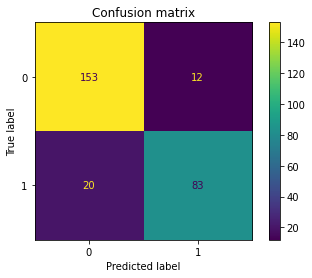

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

model = LogisticRegression(max_iter=1000, random_state=2)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion matrix");

The confusion matrix shows that the model is pretty good at predicting label 0 (not survived), and a bit less in predicting the label 1. This makes sense though, since there are more non-survivers than survivors from the titanic disaster. We should also take a look at the precision, recall and F1-score of the baseline model to get the full picture. 

#### Precision

The precision of the model shows how well the model is able to avoid false positives. So in this analyis, it shows how well it is at avoiding to label a passenger a survivor when the passenger did not survive. 

In [280]:
scores = cross_val_score(log_reg, X_new, y, cv=10, scoring="precision") 
log_reg_precision = scores.mean()
log_reg_precision

0.8233793693947036

The precision of the baseline model is 82.3%, which is a pretty good score already. 

#### Recall

The recall metric describes how well the model is at finding the correct label. So in this case, it it about correctly predicting that a passenger survived. It is important to also take into account the precision, since only looking at the recall can risk many false positives. 

In [281]:
scores = cross_val_score(log_reg, X_new, y, cv=10, scoring="recall") 
log_reg_recall = scores.mean()
log_reg_recall

0.7102521008403361

Again the score on this metric is quite good, at a recall of 71%.

#### F1-score

The F1-score takes both the precision and the recall into account, and gives the model an overall score on it's performance. 

In [282]:
scores = cross_val_score(log_reg, X_new, y, cv=10, scoring="f1") 
log_reg_f1 = scores.mean()
log_reg_f1

0.7592774365687236

The F1 score is at 75.9% for the baseline model, which is quite good. Let's see if we can get our scores even better by using less features. 

In [283]:
model_scoring = pd.DataFrame({"Score": ["accuracy", "precision", "recall", "F1"], 
                              "Logistic Regression": [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]})
model_scoring.set_index("Score")

Logistic Regression
Score                         
accuracy              0.830499
precision             0.823379
recall                0.710252
F1                    0.759277

#### Less features

From the feature selection, we saw that not every feature was equally import for the prediction model. Therefore, we might be able to get even better scores with less features. Let's start with only the top 5 of the most important features. 

In [284]:
X_5 = features_df[list(importance_df.sort_values(by="score decrease", ascending = False)["feature"].head(5))]
X_5

Sex  Master  Pclass_3  Family  Embarked_S
0    1.0     0.0       1.0     0.1         1.0
1    0.0     0.0       0.0     0.1         0.0
2    0.0     0.0       1.0     0.0         1.0
3    0.0     0.0       0.0     0.1         1.0
4    1.0     0.0       1.0     0.0         1.0
..   ...     ...       ...     ...         ...
886  1.0     0.0       0.0     0.0         1.0
887  0.0     0.0       0.0     0.0         1.0
888  0.0     0.0       1.0     0.3         1.0
889  1.0     0.0       0.0     0.0         0.0
890  1.0     0.0       1.0     0.0         0.0

[891 rows x 5 columns]

In [285]:
from sklearn.model_selection import cross_validate

log_reg_5 = LogisticRegression(max_iter=1000, random_state=2) 
scores = cross_validate(log_reg_5, X_5, y, cv=10, 
                        scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring["log_reg_5"] = [scores["test_accuracy"].mean(), 
                              scores["test_precision"].mean(), 
                              scores["test_recall"].mean(),
                              scores["test_f1"].mean()]

model_scoring
#print(f'accuracy: {scores["test_accuracy"].mean()}\nprecision: {scores["test_precision"].mean()}\nrecall: {scores["test_recall"].mean()}\nF1: {scores["test_f1"].mean()}\n')

Score  Logistic Regression  log_reg_5
0   accuracy             0.830499   0.822672
1  precision             0.823379   0.811584
2     recall             0.710252   0.701597
3         F1             0.759277   0.748820

Even though our precision went up a little bit, the other scores did not improve. Let's try with a few more features. 

In [286]:
for i in range(6, 8):
    X_i = features_df[list(importance_df.sort_values(by="score decrease", ascending = False)["feature"].head(i))]
    log_reg_i = LogisticRegression(max_iter=1000, random_state=2) 
    scores = cross_validate(log_reg_i, X_i, y, cv=10, 
                            scoring =["accuracy", "precision", "recall", "f1"]) 
    model_scoring[f"log_reg_{i}"] = [scores["test_accuracy"].mean(), 
                              scores["test_precision"].mean(), 
                              scores["test_recall"].mean(),
                              scores["test_f1"].mean()]

model_scoring

Score  Logistic Regression  log_reg_5  log_reg_6  log_reg_7
0   accuracy             0.830499   0.822672   0.828290   0.832747
1  precision             0.823379   0.811584   0.823961   0.828192
2     recall             0.710252   0.701597   0.701513   0.710252
3         F1             0.759277   0.748820   0.754776   0.761684

The model_scoring table shows that decreasing the number of features to 7 actually increases our scores. Therefore, we will remove the log_reg_5 and the log_reg_6 scores from our table. 

Before we move on with a new model to score, let's only keep the original Logistic Regression score and the X_7 score. 

In [287]:
model_scoring.drop(columns=["log_reg_5", "log_reg_6"], inplace=True)
model_scoring

Score  Logistic Regression  log_reg_7
0   accuracy             0.830499   0.832747
1  precision             0.823379   0.828192
2     recall             0.710252   0.710252
3         F1             0.759277   0.761684

### Decision Tree

Another useful model for classification problems is the Decision Tree model. It breaks down the data by using True/False-questions. This allows us to not only classify the data points, but also understand and visualize how the data can be broken down. 

In [288]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X_new,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

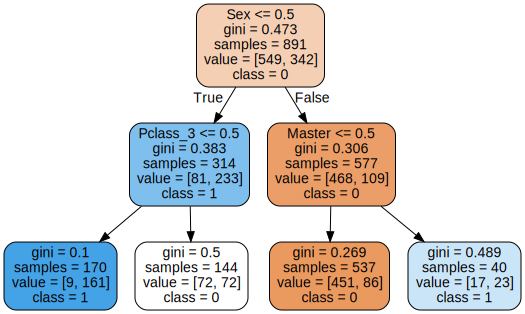

In [289]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="titanic_tree.dot", feature_names=X_new.columns,
                class_names=['0','1'], rounded=True, filled=True)

with open("titanic_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

The first decision tree that was created, is 2 levels deep and starts with the question whether the passengers Sex is less than 0.5, so if it is 0. As male is set to 1 and female to 0 when we encoded the feature, female will be True and male will be False.  If the passenger is female, it will check wether the Pclass is less than 0.5 (meaning that it is not Pclass_3), and the passenger is male, it will check whether the Title is Master.

Let's check how well our 2-level tree is scoring on accuracy. 

In [290]:
scores = cross_validate(tree_clf, X_new, y, cv=10, 
                        scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"tree_2_levels"] = [scores["test_accuracy"].mean(), 
                              scores["test_precision"].mean(), 
                              scores["test_recall"].mean(),
                              scores["test_f1"].mean()]
model_scoring

Score  Logistic Regression  log_reg_7  tree_2_levels
0   accuracy             0.830499   0.832747       0.776729
1  precision             0.823379   0.828192       0.761389
2     recall             0.710252   0.710252       0.625798
3         F1             0.759277   0.761684       0.673586

It's not performing better than the logistic regression models. Perhaps it will be better if we add a few more levels. We will use a GridSearchCV model for this, which will give us the best combination of parameters for a specific model. The best parameters in this case are determined based on the accuracy score. 

For the Decision Tree only search for the best value for the parameter:
- max_depth: how many levels the decision tree will have as a maximum 


In [293]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[3, 4, 5, 6, 7]}
tree_clf = DecisionTreeClassifier(random_state=2)
grid_tree_clf = GridSearchCV(estimator=tree_clf, param_grid=parameters, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_tree_clf.fit(X_new, y)

print(f"best parameters:{grid_tree_clf.best_params_}\nbest accuracy score:{grid_tree_clf.best_score_}")

best parameters:{'max_depth': 3}
best accuracy score:0.8294007490636706


The decision tree with 3 levels scored better than the previous models. Let's include all of the scoring metrics and see what the decision tree looks like. 

In [294]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=2)
scores = cross_validate(tree_clf, X_new, y, cv=10, 
                        scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"tree_3_levels"] = [scores["test_accuracy"].mean(), 
                              scores["test_precision"].mean(), 
                              scores["test_recall"].mean(),
                              scores["test_f1"].mean()]
model_scoring

Score  Logistic Regression  log_reg_7  tree_2_levels  tree_3_levels
0   accuracy             0.830499   0.832747       0.776729       0.829401
1  precision             0.823379   0.828192       0.761389       0.811033
2     recall             0.710252   0.710252       0.625798       0.724874
3         F1             0.759277   0.761684       0.673586       0.761247

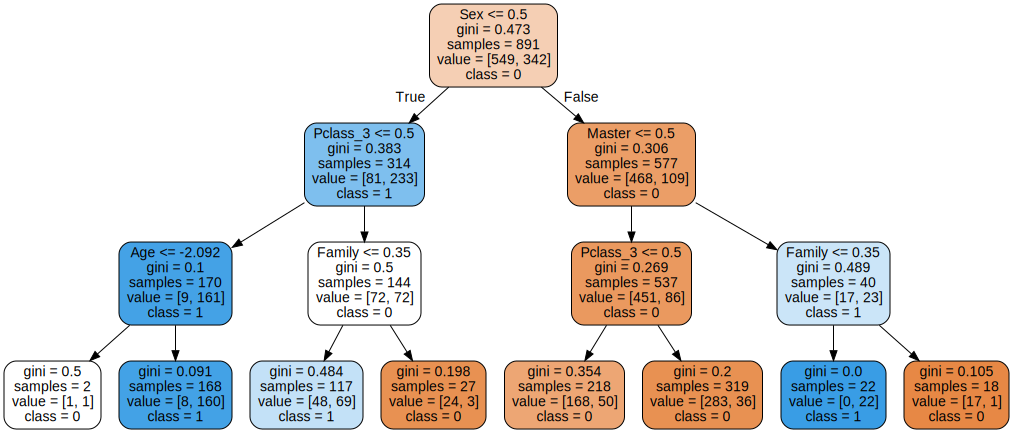

In [295]:
tree_clf.fit(X_new, y)
export_graphviz(tree_clf, out_file="titanic_tree_3.dot", feature_names=X_new.columns,
                class_names=['0','1'], rounded=True, filled=True)

with open("titanic_tree_3.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

As the model is not doing better than our baseline model, we can try to see if a Random Forrest model will increase the accuracy of the predictions. Let's remove the 2 level tree scores from the table. 

In [296]:
model_scoring.drop(columns="tree_2_levels", inplace=True)
model_scoring

Score  Logistic Regression  log_reg_7  tree_3_levels
0   accuracy             0.830499   0.832747       0.829401
1  precision             0.823379   0.828192       0.811033
2     recall             0.710252   0.710252       0.724874
3         F1             0.759277   0.761684       0.761247

### Random Forest

A Random Forest is a bagging method that allows us to use multiple decision trees to predict the target, whereby each decision tree looks at a sample of the entire dataset (with replacement). The final target will be predicted by voting on the most common prediction of all decision trees. 

Again we will use a GridSearchCV to determine the best parameters:
- n_estimators: number of trees in the forest
- max_depth: maximum number of levels for each tree

In [301]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
parameters = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300], 
              'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid_forest = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_forest.fit(X_new, y)

print(f"best parameters:{grid_forest.best_params_}\nbest accuracy score:{grid_forest.best_score_}")

best parameters:{'max_depth': 5, 'n_estimators': 200}
best accuracy score:0.8417353308364545


A Random Forest with 100 trees and a maximum of 5 levels is optimal, so we will include these scores in the model_scoring table. 

In [304]:
forest = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=2)
scores = cross_validate(forest, X_new, y, cv=10, 
                        scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"forest_5_200"] = [scores["test_accuracy"].mean(), 
                              scores["test_precision"].mean(), 
                              scores["test_recall"].mean(),
                              scores["test_f1"].mean()]

In [305]:
model_scoring

Score  Logistic Regression  log_reg_7  tree_3_levels  forest_5_200
0   accuracy             0.830499   0.832747       0.829401      0.842871
1  precision             0.823379   0.828192       0.811033      0.888622
2     recall             0.710252   0.710252       0.724874      0.672269
3         F1             0.759277   0.761684       0.761247      0.762526

The Random Forest with 5 levels and 200 trees has given us the best accuracy so far. Let's see if we can make the Random Forest model even better by using some Boosting methods. 

### AdaBoosted Trees 

AdaBoosting (Adaptive Boosting) is boosting technique that works particularly well with decision trees. It again uses multiple decision trees that each take a sample of the dataset into account for the classification. However, this time the next tree will take the mistakes from the previous tree into account. Where the Random Forest was creating decision trees simultaniously, the Adaboosted Trees model is a sequential ensemble method. Each time a new tree is created, the weight from the trees that predicted the label incorrectly was increased compared to the trees that predicted the label correctly. In this way, the complete model makes mistakes as a higher priority to learn from than the correct predictions, making the model even better. 

Let's search for the best values of these parameters:
- n_estimators: number of trees in the forest
- max_depth: maximum number of levels for each tree
- learning_rate: how much should the model learn from the previous trees

In [315]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {"base_estimator__max_depth" : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              "n_estimators": [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300],
              "learning_rate": [0.001, 0.01, 0.1, 1]
             }

tree = DecisionTreeClassifier(random_state=2)
adaboost = AdaBoostClassifier(base_estimator=tree)

grid_adaboost = GridSearchCV(adaboost, param_grid=param_grid, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_adaboost.fit(X_new, y)

print(f"best parameters:{grid_adaboost.best_params_}\nbest accuracy score:{grid_adaboost.best_score_}")

best parameters:{'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 250}
best accuracy score:0.8372534332084894


In [317]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=2), n_estimators=250, learning_rate=0.01)
adaboost.fit(X_new, y)
scores = cross_validate(adaboost, X_new, y, cv=10, 
                        scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"adaboost_3_250_0.01"] = [scores["test_accuracy"].mean(), 
                              scores["test_precision"].mean(), 
                              scores["test_recall"].mean(),
                              scores["test_f1"].mean()]
model_scoring

Score  Logistic Regression  log_reg_7  tree_3_levels  forest_5_200  \
0   accuracy             0.830499   0.832747       0.829401      0.842871   
1  precision             0.823379   0.828192       0.811033      0.888622   
2     recall             0.710252   0.710252       0.724874      0.672269   
3         F1             0.759277   0.761684       0.761247      0.762526   

   adaboost_5_75  adaboost_3_250_0.01  
0       0.837253             0.837253  
1       0.851437             0.851437  
2       0.695546             0.695546  
3       0.761958             0.761958

The AdaBoost method did increase our scores, but not more than the Random Forest. Let's try the GradientBoostinClassifier instead.

### GradientBoosting

The GradientBoostClassifier works in the same way as the AdaBoostClassifier. It creates multiple decision trees in sequential order, and learns from the previous tree. The difference between the AdaBooster and the GradientBooster is that the GradientBooster does not take the incorrect predictions to learn from, but the residuals from the predictions. In this way, it knows not that it was wrongly predicted, but also how much it was wrong.  

Let's search for the best GradientBoostingClassifier by checking the parameters:
- n_estimators: number of trees in the forest
- max_depth: maximum number of levels for each tree
- learning_rate: how much should the model learn from the previous trees

In [320]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {"max_depth" : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              "n_estimators": [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300],
              "learning_rate": [0.001, 0.01, 0.1, 1]
             }

grad_boost = GradientBoostingClassifier(random_state=2)
grid_gradboost = GridSearchCV(grad_boost, param_grid=param_grid, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_gradboost.fit(X_new, y)

print(f"best parameters:{grid_gradboost.best_params_}\nbest accuracy score:{grid_gradboost.best_score_}")

best parameters:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
best accuracy score:0.8395006242197255


In [324]:
grad_boost = GradientBoostingClassifier(max_depth=4, n_estimators=100, learning_rate=0.1, random_state=2)
grad_boost.fit(X_new, y)
scores = cross_validate(grad_boost, X_new, y, cv=10, 
                            scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"gradboost_4_100_0.1"] = [scores["test_accuracy"].mean(), 
                                  scores["test_precision"].mean(), 
                                  scores["test_recall"].mean(),
                                  scores["test_f1"].mean()]

In [325]:
model_scoring

Score  Logistic Regression  log_reg_7  tree_3_levels  forest_5_200  \
0   accuracy             0.830499   0.832747       0.829401      0.842871   
1  precision             0.823379   0.828192       0.811033      0.888622   
2     recall             0.710252   0.710252       0.724874      0.672269   
3         F1             0.759277   0.761684       0.761247      0.762526   

   adaboost_5_75  adaboost_3_250_0.01  gradboost_3  gradboost_4_100_0.1  
0       0.837253             0.837253     0.822697             0.822697  
1       0.851437             0.851437     0.821885             0.821885  
2       0.695546             0.695546     0.687059             0.687059  
3       0.761958             0.761958     0.746727             0.746727

Let's see if we can get an even higher score by using an Extreme Gradient Booster. 

### Extreme Gradient Booster

The XGBOOST (Extreme Gradient Booster) draws it's methods for boosting from Deep Learning. It uses a random forest to determine the best classification, and measures the score after adding each tree. It then determines which option was best, and then returns that model. 

The parameters te check are again:
- n_estimators: number of trees in the forest
- max_depth: maximum number of levels for each tree
- learning_rate: how much should the model learn from the previous trees

In [327]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(use_label_encoder=False)
param_grid = {"max_depth" : [3, 4, 5, 6, 7, 8, 9, 10],
              "n_estimators": [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300],
              "learning_rate": [0.001, 0.01, 0.1, 1]
             }

grid_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_xgboost.fit(X_new, y)

print(f"best parameters:{grid_xgboost.best_params_}\nbest accuracy score:{grid_xgboost.best_score_}")

[15:18:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [328]:
xgboost = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
xgboost.fit(X_new, y)
scores = cross_validate(xgboost, X_new, y, cv=10, 
                            scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"xgboost_3"] = [scores["test_accuracy"].mean(), 
                                  scores["test_precision"].mean(), 
                                  scores["test_recall"].mean(),
                                  scores["test_f1"].mean()]

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/judithvanleersum/.pyenv/versions/lewagon/envs/TheOtherOption/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg,

[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [330]:
model_scoring

Score  Logistic Regression  log_reg_7  tree_3_levels  forest_5_200  \
0   accuracy             0.830499   0.832747       0.829401      0.842871   
1  precision             0.823379   0.828192       0.811033      0.888622   
2     recall             0.710252   0.710252       0.724874      0.672269   
3         F1             0.759277   0.761684       0.761247      0.762526   

   adaboost_5_75  adaboost_3_250_0.01  gradboost_3  gradboost_4_100_0.1  \
0       0.837253             0.837253     0.822697             0.822697   
1       0.851437             0.851437     0.821885             0.821885   
2       0.695546             0.695546     0.687059             0.687059   
3       0.761958             0.761958     0.746727             0.746727   

   xgboost_3  
0   0.837241  
1   0.860077  
2   0.686891  
3   0.760041

As a final model, we can see whether a Support Vector Classifier will give us even better scores.

### Support Vector Classifier

The Support Vector Classifier will try to find the best fitting line between the two classes, and adds a margin on both sides of the line to allow generalization. We can tweak some parameters:
- C: how much will points on the wrong side of the margin be penalized, where a higher C will mean a smaller margin and thus a higher penalty. 
- kernel: the kernel that will be used to define how the points will be divided. 
- gamma: defines how far the influence of a single training instance reaches

In [331]:
from sklearn.svm import SVC

svc = SVC()
parameters = {"C": [0.01, 0.1, 1, 10],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": [0.001, 0.01, 0.1, 1]}
grid_svc = GridSearchCV(estimator=svc, param_grid=parameters, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_svc.fit(X_new, y)

print(f"best parameters:{grid_svc.best_params_}\nbest accuracy score:{grid_svc.best_score_}")

best parameters:{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
best accuracy score:0.8383770287141074


In [332]:
svc = SVC(C=1, kernel="rbf", gamma=1)
svc.fit(X_new, y)
scores = cross_validate(svc, X_new, y, cv=10, 
                            scoring =["accuracy", "precision", "recall", "f1"]) 
model_scoring[f"svc_rbf_c10"] = [scores["test_accuracy"].mean(), 
                                  scores["test_precision"].mean(), 
                                  scores["test_recall"].mean(),
                                  scores["test_f1"].mean()]
model_scoring

Score  Logistic Regression  log_reg_7  tree_3_levels  forest_5_200  \
0   accuracy             0.830499   0.832747       0.829401      0.842871   
1  precision             0.823379   0.828192       0.811033      0.888622   
2     recall             0.710252   0.710252       0.724874      0.672269   
3         F1             0.759277   0.761684       0.761247      0.762526   

   adaboost_5_75  adaboost_3_250_0.01  gradboost_3  gradboost_4_100_0.1  \
0       0.837253             0.837253     0.822697             0.822697   
1       0.851437             0.851437     0.821885             0.821885   
2       0.695546             0.695546     0.687059             0.687059   
3       0.761958             0.761958     0.746727             0.746727   

   xgboost_3  svc_rbf_c10  
0   0.837241     0.838377  
1   0.860077     0.890629  
2   0.686891     0.657731  
3   0.760041     0.754072

We have now used different models to use in our titanic classification problem. The best model seems to be the Random Forest with 5 levels and 200 trees. 
Let's see if we can tweak this model even more to make it even better. 

### Random Forest with 5 levels and 200 trees

In [377]:
forest = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=2)
forest.fit(X_new, y)
score = cross_validate(forest, X_new, y, cv=10, scoring ="accuracy") 
accuracy = score["test_score"].mean()
accuracy

0.8428714107365793

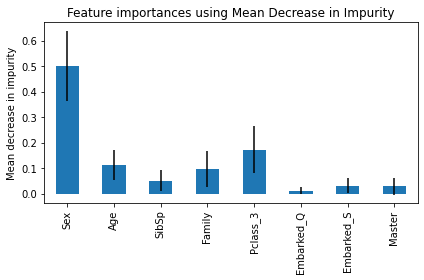

In [378]:
feature_names = X_train.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We see that the feature Embarked_Q is least important for the Random Forest model. Let's remove this from the features_list and see if this increases the accuracy of the model. 

In [379]:
X_reduced = X_new.drop(columns="Embarked_Q")
X_reduced.columns

Index(['Sex', 'Age', 'SibSp', 'Family', 'Pclass_3', 'Embarked_S', 'Master'], dtype='object')

In [381]:
forest_reduced = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=2)
forest_reduced.fit(X_reduced, y)
score = cross_validate(forest_reduced, X_reduced, y, cv=10, scoring ="accuracy") 
accuracy = score["test_score"].mean()
accuracy

0.8316479400749064

The accuracy has actually decreased. Perhaps we need to do another grid_search with the reduced features. 

In [382]:
forest_reduced = RandomForestClassifier()
parameters = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300], 
              'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid_forest_reduced = GridSearchCV(estimator=forest_reduced, param_grid=parameters, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_forest_reduced.fit(X_reduced, y)

print(f"best parameters:{grid_forest_reduced.best_params_}\nbest accuracy score:{grid_forest_reduced.best_score_}")

best parameters:{'max_depth': 5, 'n_estimators': 200}
best accuracy score:0.8372534332084894


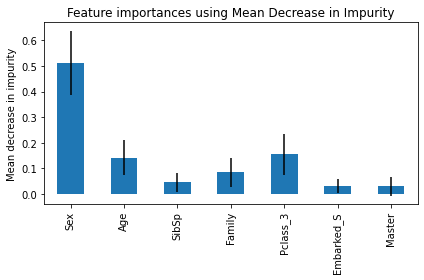

In [371]:
feature_names = X_train_reduced.columns
importances = forest_reduced.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_reduced.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Let's also remove Embarked_S. 

In [372]:
X_reduced_2 = X_reduced.drop(columns="Embarked_S")
X_reduced_2.columns

Index(['Sex', 'Age', 'SibSp', 'Family', 'Pclass_3', 'Master'], dtype='object')

In [383]:
forest_reduced_2 = RandomForestClassifier()
parameters = {'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300], 
              'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid_forest_reduced_2 = GridSearchCV(estimator=forest_reduced_2, param_grid=parameters, n_jobs=-1, scoring="accuracy", cv=10, verbose=0)
grid_forest_reduced_2.fit(X_reduced_2, y)

print(f"best parameters:{grid_forest_reduced_2.best_params_}\nbest accuracy score:{grid_forest_reduced_2.best_score_}")

best parameters:{'max_depth': 4, 'n_estimators': 300}
best accuracy score:0.8361423220973782


Reducing the number of features does not seem to improve our model, so I believe that we have reached the maximum accurcay for this classification problem. Next step: building the actual model and checking the model accuracy on the test cases in the test.csv, which the model has not seen yet. 